In [1]:
import pandas as pd
import numpy as np
import hics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm

1_wHiCS: 10 datasets, each 100 independent features, 40 of them useful  
2_wRaR: 10 datasets, each 30 independent features, 20 of them useful, 70 dependent features  
3_wRaR: 10 datasets, each 100 independent features, 50 of them useful, 100 dependent features  
5_wrar: 1 dataset, 40 independent features, 25 of them useful, 20 dependent

In [2]:
import arff
datas = []
for i in range(1, 11):
    file = open('../data/2_wrar/2_wrar_' + str(i) + '.arff', 'r')
    dataset = arff.load(file)
    file.close()
    data = pd.DataFrame(dataset['data'])
    data[100] = data[100].astype(np.float32)
    data.rename(columns=lambda c: str(c), inplace=True)
    datas.append(data)
target = str(100)

In [3]:
data = datas[0] # pd.concat(datas).reset_index(drop=True)

In [ ]:
np.unique(data[target], return_counts=True)[1] / len(data)

In [ ]:
import arff
file = open('../data/5_wrar.arff', 'r')
dataset = arff.load(file)
data = pd.DataFrame(dataset['data'])
data[60] = data[60].astype(np.float32)
data.rename(columns=lambda c: str(c), inplace=True)
target = str(60)

In [4]:
%pdb 0
import csrar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

max_k = 30
classes = np.arange(len(np.unique(data[target])))
columns = ['RaR' + str(i) for i in classes] + ['wRaR' + str(i) for i in classes]
scores = pd.DataFrame(columns=['wRaR', 'RaR'], index=np.arange(1, max_k + 1)).fillna(0)

# Compensating RaR
#
#
rar = csrar.rar.RaR(data)
rar.run(target, k=5, runs=200, split_iterations=10, compensate_imbalance=True)

# Standard RaR
#
#
rar_nocomp = csrar.rar.RaR(data)
rar_nocomp.run(target, k=5, runs=200, split_iterations=10,
               compensate_imbalance=False)

Automatic pdb calling has been turned OFF
Generated cost matrix:
         0.0   1.0       2.0        3.0       4.0
0  33.112583  20.0  2.352941  14.285714  2.354049
Overall cost matrix:
         0.0   1.0       2.0        3.0       4.0
0  33.112583  20.0  2.352941  14.285714  2.354049
Relevance: 100.00%    
Running optimizer...
Optimizer done.
defaultdict(<class 'int'>, {'34': 7.8025944844157061e-10, '50': 2.7125323781870395e-08, '48': 0.005480551550159295, '75': 0.051204356039098738, '17': 0.28757452654386095, '22': 0.14565231209063337, '21': 0.11041510257520001, '90': 0.022303788440849428, '69': 0.23629167002944704, '98': 0.11021338251552541, '14': 0.38399383545317933, '65': 0.0036306508638446005, '72': 0.22397878739646973, '92': 0.17614782936666556, '56': 0.11749025376951702, '89': 0.17475038397735196, '38': 0.14523466360293941, '31': 9.6002843025621402e-09, '53': 0.049977209324306646, '19': 0.10301132840926468, '54': 0.48682535429727364, '77': 0.093863413308799076, '37': 0.13178069

Redundancy: 100.00%    
1. 8 with a score of 0.9979759113409086
2. 96 with a score of 0.9796281446237727
3. 77 with a score of 0.9475472790039866
4. 59 with a score of 0.9424452936120544
5. 15 with a score of 0.9234275025625519
6. 90 with a score of 0.9158584114997939
7. 54 with a score of 0.9138149720362415
8. 52 with a score of 0.8914579396484753
9. 70 with a score of 0.8909640353329557
10. 5 with a score of 0.8081550659621576
11. 81 with a score of 0.7868497472976457
12. 49 with a score of 0.7669266569150341
13. 18 with a score of 0.7351623449485011
14. 6 with a score of 0.7350697218343142
15. 95 with a score of 0.7178241778222
16. 92 with a score of 0.7086479049327885
17. 27 with a score of 0.6962588531951557
18. 69 with a score of 0.6962540410957753
19. 4 with a score of 0.6766143940668141
20. 84 with a score of 0.672725995227656
21. 38 with a score of 0.6722773781541651
22. 75 with a score of 0.6496340121724694
23. 61 with a score of 0.6479084867466629
24. 36 with a score of 0.64

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:111

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:111

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:111

wRaR       RaR
1   0.236240  0.210432
2   0.260249  0.216560
3   0.257920  0.231701
4   0.285476  0.240985
5   0.291875  0.266416
6   0.307600  0.268082
7   0.326879  0.288634
8   0.337250  0.294218
9   0.349471  0.312741
10  0.359545  0.314903
11  0.380589  0.319331
12  0.381070  0.329959
13  0.391476  0.331397
14  0.401465  0.342814
15  0.391020  0.338674
16  0.403433  0.346899
17  0.421620  0.349105
18  0.419197  0.353966
19  0.424195  0.360445
20  0.445436  0.356420
21  0.440287  0.352567
22  0.444891  0.360643
23  0.455255  0.364028
24  0.454672  0.368141
25  0.447099  0.359370
26  0.446451  0.390991
27  0.448503  0.386685
28  0.458454  0.384010
29  0.467053  0.396344
30  0.464730  0.397889

In [24]:
# Train/Test split
X = data.drop(target, axis=1)
y = data[target]

# Test Classifier
#
#
rank_columns_nocomp = [r[0] for r in rar_nocomp.feature_ranking]
from sklearn.metrics import f1_score
for k in range(1, max_k + 1):
    clf = KNeighborsClassifier(n_neighbors=1)
    f1_macros = cross_val_score(clf, X[rank_columns_nocomp[:k]], y, cv=3, scoring='f1_macro')
    scores.loc[k, 'RaR'] = np.mean(f1_macros)

    # clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
    # y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
    # score = f1_score(y_test, y_predict_ideal, average='macro')
    # scores.loc[k, 'RaR'] += score
    # for i, s in enumerate(score):
    #    scores.loc[k, 'RaR' + str(i)] += s

rank_columns = [r[0] for r in rar.feature_ranking]
for k in range(1, max_k + 1):
    clf_selected = KNeighborsClassifier(n_neighbors=1)
    f1_macros = cross_val_score(clf_selected, X[rank_columns[:k]], y, cv=3, scoring='f1_macro')
    scores.loc[k, 'wRaR'] = np.mean(f1_macros)
    
    # clf_selected.fit(X_train[rank_columns[:k]], y_train)
    # y_predict = clf_selected.predict(X_test[rank_columns[:k]])
    # score = f1_score(y_test, y_predict, average='macro')
    # scores.loc[k, 'wRaR'] += score
    # for i, s in enumerate(score):
    #    scores.loc[k, 'wRaR' + str(i)] += s

# scores.to_csv('final2_wRaR_2wrar_knn_3cv.csv')
scores

wRaR       RaR
1   0.259694  0.191504
2   0.285987  0.203374
3   0.276159  0.221759
4   0.309678  0.234230
5   0.319656  0.260068
6   0.329584  0.259156
7   0.349556  0.257794
8   0.388516  0.255343
9   0.375805  0.285625
10  0.378667  0.295440
11  0.359910  0.302095
12  0.360654  0.296839
13  0.356081  0.290134
14  0.351754  0.290797
15  0.353740  0.284652
16  0.352405  0.302314
17  0.360577  0.302674
18  0.352763  0.286935
19  0.348317  0.285373
20  0.352151  0.288254
21  0.357877  0.285927
22  0.356682  0.283963
23  0.363161  0.283621
24  0.367363  0.305225
25  0.364283  0.285475
26  0.365576  0.303437
27  0.362987  0.305102
28  0.359848  0.304337
29  0.374648  0.328542
30  0.382673  0.325167

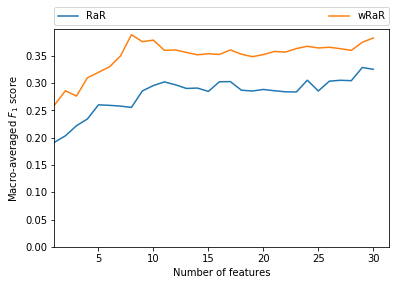

In [25]:
import matplotlib.pyplot as plt
plt.plot(scores['RaR'][:30], label='RaR')
plt.plot(scores['wRaR'][:30], label='wRaR')
ax = plt.gca()
ax.set_xlabel('Number of features')
ax.set_ylabel(r'Macro-averaged $F_1$ score')
ax.set_ylim(0.0)
ax.set_xlim(1)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig('final2_wRaR_2wrar_1nn_3cv_best30')
plt.show()

In [ ]:
scores

In [ ]:
# Artificially imbalance dataset
class0 = data.loc[data[target] == 0]
class1 = data.loc[data[target] == 1]
imb_data = pd.concat([class1.sample(frac=0.02), class0]).reset_index(drop=True)
# For perfectly balanced dataset, this will result in a 97.56:2.44 ratio

## Ground truth

In [ ]:
# For test7.arff
weights = [0.5335601544927123, 0.759839177764759, 0.772151052808685, 0.7625265610410171,
           0.5612073314384326, 0.34594353279215817, 0.26778115186982904, 0.05104168604756121,
           0.24539066769327755, 0.4298986108981449, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=input_features, index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
# For test8.arff
weights = [0.5335601544927123, 0.759839177764759, 0.772151052808685, 0.7625265610410171,
           0.5612073314384326, 0.34594353279215817, 0.26778115186982904, 0.05104168604756121,
           0.24539066769327755, 0.4298986108981449, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=data.columns[:20], index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
# For test9.arff
weights = [0.7168886878437233, 0.1650913157879492, 0.7017219042598103, 0.5371651431980248,
           0.4012494719087343, 0.08997742462568355, 0.4133240085774441, 0.3003377473503873,
           0.12858013417222078, 0.5857996257919974, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=data.columns[:20], index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
# For test10.arff
weights = [0.2673055187472877, 0.196159223714542, 0.701161636883324, 0.765385125610722,
           0.0011260947105074194, 0.22801651296579062, 0.8949526553930152, 0.13072480437597472,
           0.6333889311003507, 0.7420344156127076, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=data.columns[:70], index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
ideal_ranking = ground_truth.sort_values(0, axis=1, ascending=False).columns

## Compensating HiCS

## Standard HiCS

## Testing classifier

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)
X_res = pd.DataFrame(X_res, columns=X_train.columns)
# y_res = pd.DataFrame(y_res, columns=[20])

In [ ]:
counts/len(datas[0])

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

values, counts = np.unique(datas[0][target], return_counts=True)
marg = ax.bar(np.arange(5), counts/len(datas[0]), 0.35, color='green')
cond = ax.bar(np.arange(5) + 0.35, [0.03, 0.05, 0.7, 0.07, 0.15], 0.35, color='orange')
# ax.bar(np.arange(5), counts/len(data), 0.35, color='green')

ax.set_ylabel('Probability')
ax.set_xlabel('Class')
ax.set_title('Marginal and conditional probabilities')
ax.set_xticks(np.arange(5) + 0.35 / 2)
ax.set_xticklabels(('$c_1$', '$c_2$', '$c_3$', '$c_4$', '$c_5$'))
ax.set_ylim([0, 1])

ax.legend((marg, cond), ('Marginal distribution', 'Conditional distribution'))
plt.savefig('marg_cond')

plt.show()

In [ ]:
import warnings
warnings.filterwarnings("default")

In [ ]:
scores

In [ ]:
for data in datas:
    values, counts = np.unique(data[target], return_counts=True)
    print(counts/len(data))

In [ ]:
columns[:3]

In [ ]:
k = 15
results_nocomp = []
rank_columns_nocomp = [r[0] for r in rar_nocomp.feature_ranking]
from sklearn.metrics import f1_score
for j in range(25):
    clf = RandomForestClassifier()
    clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
    y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
    results_nocomp.append(f1_score(y_test, y_predict_ideal, average='macro'))

results = []
rank_columns = [r[0] for r in rar.feature_ranking]
for j in range(25):
    clf_selected = RandomForestClassifier()
    clf_selected.fit(X_train[rank_columns[:k]], y_train)
    y_predict = clf_selected.predict(X_test[rank_columns[:k]])
    results.append(f1_score(y_test, y_predict, average='macro'))

print('Dataset 1_whics_' + str(i+1))#, file=log)
print('Weighted RaR macro-weighted F1: ' + str(np.mean(results)))#, file=log)
print('Standard RaR macro-weighted F1: ' + str(np.mean(results_nocomp)))#, file=log)
print('Difference weighted-standard: ' + str(np.mean(results) - np.mean(results_nocomp)))#, file=log)

## Cumulative Gain

In [ ]:
ideal_CG = [ground_truth.loc[0, ideal_ranking[:i].values].sum()
            for i in range(len(ideal_ranking))]
CG = [ground_truth.loc[0, [r for r in rank_columns[:i]]].sum()
      for i in range(len(rank_columns))]
nocomp_CG = [ground_truth.loc[0, [r for r in rank_columns_nocomp[:i]]].sum()
             for i in range(len(rank_columns_nocomp))]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(CG, label='Cumulative Gain Compensating HiCS')
plt.plot(nocomp_CG, label='Cumulative Gain Standard HiCS')
plt.plot(ideal_CG, label='Ideal gain')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
# plt.savefig('HiCS_test7_comp_imb2_CG_weightmod1-8')
plt.show()

## Rankings

In [ ]:
rank_columns_nocomp

In [ ]:
rank_columns

In [ ]:
ideal_ranking

In [ ]:
log = open('binary_wHiCS_log.txt', 'w')
for i, data in enumerate(datas):
    # Compensating HiCS
    #
    #
    values, counts = np.unique(data[target], return_counts=True)
    cost_matrix = pd.DataFrame(columns=values)
    for value, count in zip(values, counts):
        weighting = (len(data) / count)
        cost_matrix[value] = [weighting]
    cost_matrix = cost_matrix
    cost_matrix

    from hics.result_storage import DefaultResultStorage
    input_features = [ft for ft in data.columns.values if ft != target]
    storage = DefaultResultStorage(input_features)

    from hics.incremental_correlation import IncrementalCorrelation
    correlation = IncrementalCorrelation(data, target, storage,
                                         iterations=50, alpha=0.1,
                                         drop_discrete=False, cost_matrix=cost_matrix)

    correlation.update_bivariate_relevancies(runs=5)

    ranking = storage.get_relevancies().relevancy.sort_values(ascending=False)
    rank_columns = [tup[0] for tup in ranking.index.values]

    # Standard HiCS
    #
    #
    input_features = [ft for ft in data.columns.values if ft != target]
    storage_nocomp = DefaultResultStorage(input_features)
    correlation_nocomp = IncrementalCorrelation(data, target, storage_nocomp,
                                                iterations=50, alpha=0.1,
                                                drop_discrete=False, cost_matrix=None)

    correlation_nocomp.update_bivariate_relevancies(runs=5)

    ranking_nocomp = storage_nocomp.get_relevancies(
    ).relevancy.sort_values(ascending=False)
    rank_columns_nocomp = [tup[0] for tup in ranking_nocomp.index.values]

    # Train/Test split
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Test Classifier
    #
    #
    k = 10
    results_nocomp = []
    from sklearn.metrics import f1_score
    for j in range(100):
        clf = RandomForestClassifier()
        clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
        y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
        results_nocomp.append(
            f1_score(y_test, y_predict_ideal, average='macro'))

    results = []
    for j in range(100):
        clf_selected = RandomForestClassifier()
        clf_selected.fit(X_train[rank_columns[:k]], y_train)
        y_predict = clf_selected.predict(X_test[rank_columns[:k]])
        results.append(f1_score(y_test, y_predict, average='macro'))
    
    print('Dataset 1_whics_' + str(i+1), file=log)
    print('Weighted RaR macro-weighted F1: ' + str(np.mean(results)), file=log)
    print('Standard RaR macro-weighted F1: ' + str(np.mean(results_nocomp)), file=log)
    print('Difference weighted-standard: ' + str(np.mean(results) - np.mean(results_nocomp)), file=log)
    log.flush()

In [ ]:
import csrar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict

max_k = 50
classes = np.arange(len(np.unique(datas[0][target])))
columns = ['RaR' + str(i) for i in classes] + ['wRaR' + str(i) for i in classes]
scores = pd.DataFrame(columns=columns, index=np.arange(1,max_k+1)).fillna(0)

for data in datas:
    # Compensating RaR
    #
    #
    rar = csrar.rar.RaR(data)
    rar.run(target, k=5, runs=200, split_iterations=10, compensate_imbalance=True)

    # Standard RaR
    #
    #
    rar_nocomp = csrar.rar.RaR(data)
    rar_nocomp.run(target, k=5, runs=200, split_iterations=10, compensate_imbalance=False)

    # Train/Test split
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Test Classifier
    #
    #
    rank_columns_nocomp = [r[0] for r in rar_nocomp.feature_ranking]
    from sklearn.metrics import f1_score
    for k in range(1, max_k+1):
        clf = GaussianNB()
        clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
        y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
        score = f1_score(y_test, y_predict_ideal, average='macro')
        scores.loc[k, 'RaR'] += score
        for i, s in enumerate(score):
            scores.loc[k, 'RaR' + str(i)] += s
        
    rank_columns = [r[0] for r in rar.feature_ranking]
    for k in range(1, max_k+1):
        clf_selected = GaussianNB()
        clf_selected.fit(X_train[rank_columns[:k]], y_train)
        y_predict = clf_selected.predict(X_test[rank_columns[:k]])
        score = f1_score(y_test, y_predict, average='macro')
        scores.loc[k, 'wRaR'] += score
        for i, s in enumerate(score):
            scores.loc[k, 'wRaR' + str(i)] += s

scores /= len(datas)
scores.to_csv('final_wRaR_3wrar_nb.csv')
scores

In [26]:
def gini(array):
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))